In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [21]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [2]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocks = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

In [5]:
# def get_data(stocks, start_end, date_end):

tickers = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

start_date = '2013-01-01'
end_date = '2017-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Adj Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

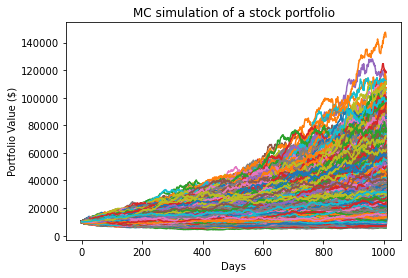

In [102]:
# Monte Carlo Method
mc_sims = 50000 # number of simulations
T = 1008 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [103]:
df = pd.DataFrame(portfolio_sims)

In [104]:
df

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,10024.073272,10046.671726,10437.001233,9818.467737,10059.977594,9965.671533,9928.906845,10151.279095,10017.500680,9952.470224,...,10083.542397,9924.418707,9947.029193,10077.710047,10145.047927,10102.902821,9812.504658,9944.668829,9980.588682,10092.357789
1,10034.214959,10146.831721,10496.896349,9868.344359,10061.999412,10054.137919,9859.621547,9983.387340,10235.457326,9874.399225,...,10021.515585,9795.232750,10019.345471,10188.011474,10133.743652,10072.176429,9640.467467,9899.691009,10225.041397,9950.128597
2,10074.274833,10134.766212,10517.522755,10023.745734,10226.947192,10206.533152,9866.452206,9778.911235,10364.149465,9955.830661,...,9969.911604,9536.123272,9855.889569,10191.824808,10164.427019,10100.537755,9534.732998,10072.970012,10261.832731,10082.122853
3,10397.075111,10165.380966,10505.510830,10062.483569,10210.836803,10152.774597,9952.587839,9646.697410,10359.799153,9950.958913,...,10072.336888,9495.740003,9871.279728,10138.485153,10432.019637,10172.220463,9523.808141,9886.416127,10182.318331,10216.340163
4,10412.883179,10119.522409,10575.456625,10105.878393,10330.892964,10097.870452,9927.219388,9870.811444,10257.935115,9971.564482,...,10017.122861,9297.151713,9831.132897,10318.469323,10436.495318,10153.707600,9597.928519,9880.619603,10325.260809,10090.505056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,23996.959027,31335.090522,34869.985354,26653.735367,43454.433484,24772.290663,42639.524045,41785.277689,37636.879363,27628.184352,...,21378.031243,13255.092298,25505.920586,23183.855934,53296.047763,40298.535875,15076.416984,17711.843266,30126.461000,31678.959769
1004,24234.331116,30556.302937,34897.284302,27047.246830,43293.464301,24883.123179,44194.771878,41924.609506,37567.382527,28175.530512,...,21388.359995,13357.352065,25291.540966,23517.475617,52280.415003,40581.176288,14981.272291,17665.735654,29947.584905,32166.057016
1005,24206.202318,30548.369890,34814.321406,27376.755382,43057.081616,25511.107920,43840.086120,41361.926793,38872.134693,28563.445517,...,21843.432089,13363.375760,25548.605160,23178.122510,52192.456782,40184.569521,14973.388249,17384.136656,30012.523216,31527.400935
1006,23784.167348,30726.755794,35068.638666,27631.813158,43021.105789,25236.815455,44093.383673,42023.073491,38821.520583,28159.693436,...,21769.250438,13220.539381,25682.929364,23857.113850,51736.917698,40504.988277,14990.107599,17556.092497,29948.126716,31095.898638


In [105]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
1007,24176.099448,31252.543552,35624.057712,27850.183651,43427.540661,25379.917971,42899.187259,42211.44879,38816.021696,28363.470324,...,21040.726384,13300.919162,25703.273045,24249.654819,51670.421668,39872.703327,14969.499699,17778.957379,29852.0668,31183.348892


In [106]:
price = df.mean(axis=1)

In [107]:
return_series = (1 + price.pct_change()).cumprod() - 1

In [108]:
total_return = return_series.tail(1)

annualized_return = ((1 + total_return)**(1/5))-1

print(annualized_return*100)

1007    24.212366
dtype: float64


## Backtesting

In [109]:
tickers2 = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

#change the date according to the year you want to backtest and compare with forecasted
start_date = '2017-01-02'
end_date = '2021-01-04'

panel_data2 = data.DataReader(tickers2,'yahoo', start_date, end_date)

In [110]:
panel_data2 = panel_data2['Adj Close']

In [111]:
panel_data2

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-03,27.297693,43.397999,58.065456,753.669983,28.542007,116.860001,41.939999,27.860001,56.687790
2017-01-04,27.267139,45.397999,57.805649,757.179993,28.465492,118.690002,42.000000,28.230000,56.922962
2017-01-05,27.405800,45.349998,57.805649,780.450012,28.704618,120.669998,41.119999,28.200001,56.250130
2017-01-06,27.711329,45.801998,58.306694,795.989990,29.699379,123.410004,40.709999,28.340000,56.243599
2017-01-09,27.965151,46.256001,58.121128,796.919983,29.412426,124.900002,40.290001,28.264999,55.936584
...,...,...,...,...,...,...,...,...,...
2020-12-28,135.679642,663.690002,222.629654,3283.959961,49.481781,277.000000,233.039993,126.720001,194.159698
2020-12-29,133.873093,665.989990,221.828033,3322.000000,50.092422,276.779999,221.369995,125.919998,193.382706
2020-12-30,132.731583,694.780029,219.383636,3285.850098,49.787102,271.869995,229.190002,126.540001,192.874649


## Portfolio Analysis

In [112]:
return_series2 = panel_data2.pct_change().dropna()
return_series2.head()

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-04,-0.001119,0.046085,-0.004474,0.004657,-0.002681,0.015660,0.001431,0.013281,0.004149
2017-01-05,0.005085,-0.001057,0.000000,0.030732,0.008401,0.016682,-0.020952,-0.001063,-0.011820
2017-01-06,0.011148,0.009967,0.008668,0.019912,0.034655,0.022707,-0.009971,0.004965,-0.000116
2017-01-09,0.009160,0.009912,-0.003183,0.001168,-0.009662,0.012074,-0.010317,-0.002646,-0.005459
2017-01-10,0.001008,-0.006097,-0.000319,-0.001280,-0.016260,-0.004404,0.012162,0.003184,0.012379


In [113]:
portfolio_weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

#apply the weights to returns
wt_portfolio = return_series2 * portfolio_weights
wt_portfolio.head()

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-04,-0.000123,0.004609,-0.000395,0.000460,-0.000448,0.002932,0.000205,0.000870,0.000164
2017-01-05,0.000560,-0.000106,0.000000,0.003036,0.001405,0.003123,-0.003002,-0.000070,-0.000467
2017-01-06,0.001227,0.000997,0.000765,0.001967,0.005798,0.004251,-0.001429,0.000325,-0.000005
2017-01-09,0.001008,0.000991,-0.000281,0.000115,-0.001616,0.002260,-0.001478,-0.000173,-0.000216
2017-01-10,0.000111,-0.000610,-0.000028,-0.000126,-0.002720,-0.000824,0.001743,0.000209,0.000489


In [114]:
portfolio_returns1 = wt_portfolio.sum(axis = 1)
portfolio_returns1.head()

Date
2017-01-04    0.008272
2017-01-05    0.004480
2017-01-06    0.013897
2017-01-09    0.000610
2017-01-10   -0.001758
dtype: float64

Start date,2017-01-04
End date,2021-01-04
Total months,47
,Backtest
Annual return,45.0%
Cumulative returns,341.0%
Annual volatility,24.6%
Sharpe ratio,1.63
Calmar ratio,1.42
Stability,0.86
Max drawdown,-31.6%


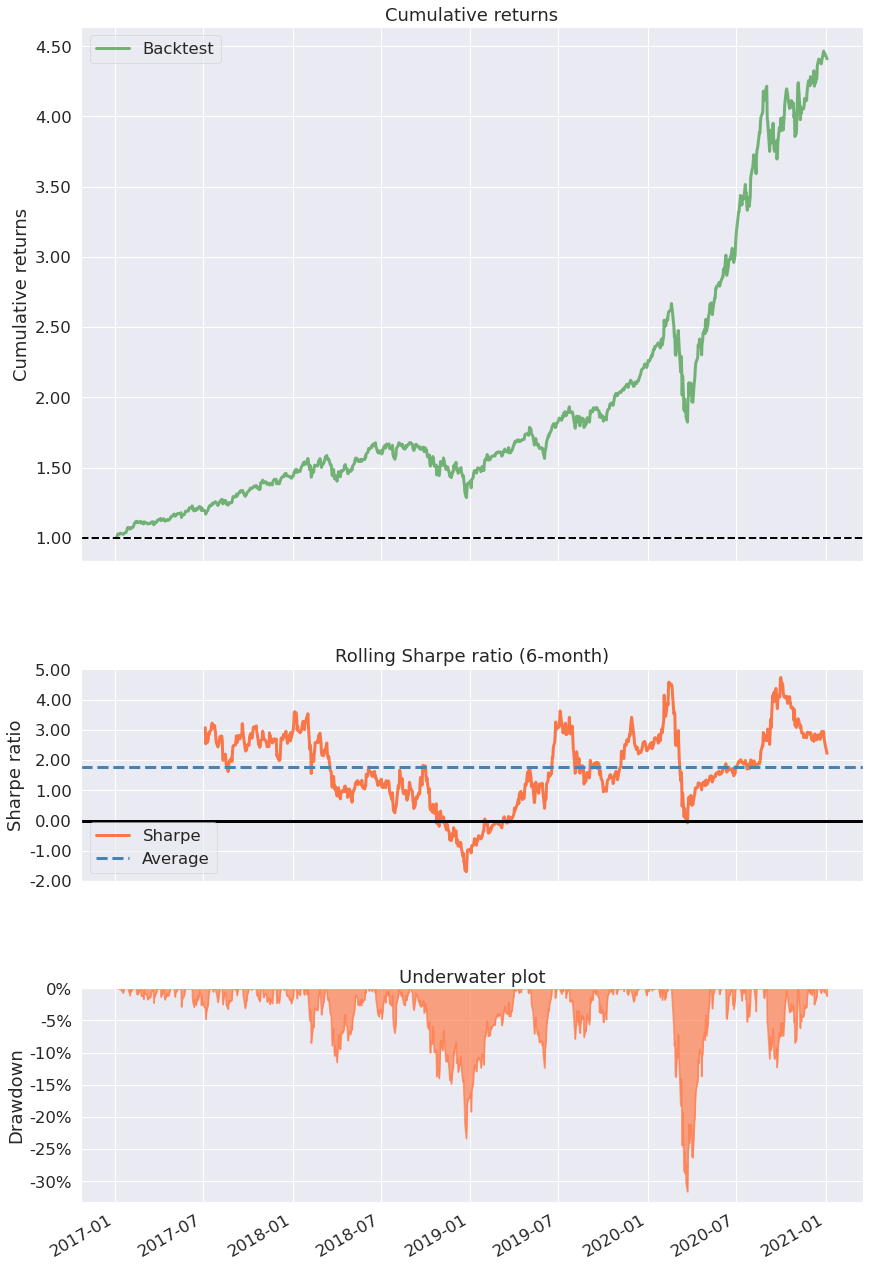

In [115]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio_returns1)

## Extra stuff

In [116]:
import itertools

In [117]:
weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

In [118]:
panel_data2 = panel_data2 * weights

In [119]:
num_cols = len(panel_data2.columns)
    
# Create a new column with the sums of all stocks named Total
panel_data2['Total'] = panel_data2.iloc[:, 0:num_cols].sum(axis=1)

In [120]:
#forecasted portfolio value
panel_data2

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL,Total
Date,,,,,,,,,,
2017-01-03,3.005476,4.339800,5.127180,74.462594,4.775078,21.876192,6.010002,1.824830,2.239168,123.660320
2017-01-04,3.002112,4.539800,5.104239,74.809383,4.762277,22.218768,6.018600,1.849065,2.248457,124.552701
2017-01-05,3.017379,4.535000,5.104239,77.108461,4.802283,22.589424,5.892496,1.847100,2.221880,127.118261
2017-01-06,3.051017,4.580200,5.148481,78.643811,4.968706,23.102353,5.833743,1.856270,2.221622,129.406203
2017-01-09,3.078963,4.625600,5.132096,78.735694,4.920699,23.381280,5.773557,1.851357,2.209495,129.708742
...,...,...,...,...,...,...,...,...,...,...
2020-12-28,14.938329,66.369000,19.658198,324.455244,8.278302,51.854400,33.394631,8.300160,7.669308,534.917573
2020-12-29,14.739428,66.598999,19.587415,328.213600,8.380462,51.813216,31.722320,8.247760,7.638617,536.941817
2020-12-30,14.613747,69.478003,19.371575,324.641990,8.329382,50.894063,32.842927,8.288370,7.618549,536.078606


In [121]:
actual_portfolio_value = []

for value in panel_data2['Total']:
    actual_portfolio_value.append(value)

In [122]:
actual_portfolio_value

[123.66031952381134,
 124.55270128517152,
 127.11826075267791,
 129.40620302410125,
 129.7087419122696,
 129.50172709732055,
 130.2285592107773,
 131.72347407341005,
 132.17843796405793,
 131.21877331924438,
 131.1322272026062,
 131.39476206760406,
 131.34376356449127,
 132.67254197463987,
 133.58871118316648,
 135.59895076408387,
 136.34074099330903,
 136.10443622760775,
 135.09326195869446,
 134.23002206687926,
 135.71598145561217,
 135.94845532779695,
 133.2517236661911,
 133.35268422050476,
 133.9425061979294,
 135.29060096530912,
 135.8554570924759,
 136.65199871597287,
 137.95076716308594,
 137.5168901922226,
 138.25314791145323,
 138.13700535278323,
 138.30241703739162,
 139.6280232820511,
 139.8841767625809,
 138.93483951187133,
 138.26289475269317,
 138.69269097537995,
 138.020297000885,
 139.59224369106292,
 138.830544616127,
 139.0011013513565,
 138.69658663024904,
 138.47735435581208,
 138.88875962867738,
 139.069863363266,
 139.18165052108762,
 139.59599611148835,
 139.342

In [123]:
len(actual_portfolio_value)

1008

In [124]:
forecasted_portfolio_value = []

for value in price:
    forecasted_portfolio_value.append(value)

In [125]:
forecasted_portfolio_value

[10010.828178411588,
 10021.311322239006,
 10032.210884465023,
 10042.069445220008,
 10052.149185375563,
 10062.84340276628,
 10073.664511344596,
 10084.462295939446,
 10094.786362784613,
 10104.739941231583,
 10115.916076697884,
 10126.5237545112,
 10137.423808084928,
 10148.254766993967,
 10160.096891155452,
 10170.976342052109,
 10181.606297043587,
 10192.930235657635,
 10204.487573170858,
 10215.795728876217,
 10228.239300547035,
 10238.436331865552,
 10250.418604374283,
 10261.717953291341,
 10272.731262032941,
 10284.114012742906,
 10294.372763840549,
 10305.487020717894,
 10317.1549511091,
 10327.651374398924,
 10338.968728307875,
 10350.013748920383,
 10360.633449753908,
 10372.008493217265,
 10382.881746019586,
 10394.928489018072,
 10406.237862180813,
 10418.387583291917,
 10429.581294215937,
 10441.634126906862,
 10452.84902605733,
 10463.53043492228,
 10475.169441257132,
 10485.70149619607,
 10497.068359310742,
 10508.690831910768,
 10521.281462952044,
 10532.62051836636,
 

In [126]:
len(forecasted_portfolio_value)

1008

## Calculate MAPE of forecasted period

In [127]:
# Define the dataset as python lists
# actual = [136, 120, 138, 155, 149]
# forecast = [134, 124, 132, 141, 149]

# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []

# Iterate over the list values
for day in range(253):

	# Calculate percentage error
	per_err = (actual_portfolio_value[day] - forecasted_portfolio_value[day]) / actual_portfolio_value[day]

	# Take absolute value of
	# the percentage error (APE)
	per_err = abs(per_err)

	# Append it to the APE list
	APE.append(per_err)

# Calculate the MAPE
MAPE = sum(APE)/len(APE)

# Print the MAPE value and percentage
print(f'''
MAPE : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE : 72.19
MAPE % : 7219.12 %



## Mean Squared Error

In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(actual_portfolio_value, forecasted_portfolio_value)))

18636.215380072335


In [13]:
df.loc[1007].max()

131562.9651025735

In [15]:
df.iloc[1007][df.iloc[1007]==df.loc[1007].max()]

945    131562.965103
Name: 1007, dtype: float64

In [16]:
df.loc[945]

0       17733.492946
1       19034.008657
2       22140.910795
3       16719.462997
4       18264.114311
            ...     
9995    19903.058984
9996    42072.938048
9997    36897.356857
9998    18262.675437
9999    27061.930583
Name: 945, Length: 10000, dtype: float64

In [11]:
percentagelist = []

for i in range(0,6000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [12]:
percentagelist

[32.19600133566015,
 22.25625546880794,
 49.462214331614085,
 17.291258982093243,
 6.84623110628758,
 35.87942930523032,
 -6.174114490826545,
 63.37612356837764,
 23.282334143797087,
 -2.645879582917292,
 39.14640138991459,
 18.50514313316889,
 22.368358146294586,
 25.050795901675176,
 49.92607450395202,
 35.268671092963146,
 2.929711946876573,
 26.672404552540048,
 31.285371222664605,
 49.88203212671673,
 38.108759725666374,
 33.49932220862457,
 28.14882013978216,
 48.071394323787324,
 -9.729629886913033,
 33.55223172680864,
 14.656517991975937,
 23.105185234961965,
 41.92601929308128,
 11.873391915610313,
 35.67803890632686,
 18.80144244831414,
 28.469769021423474,
 41.515648276049085,
 15.184199316386271,
 42.511034446705445,
 18.590233037633197,
 15.882545125597607,
 23.461144865035685,
 -4.431768941487721,
 58.232043756054374,
 25.436275182703156,
 45.78448353102867,
 10.327578384145536,
 56.45650030473579,
 20.922200056057587,
 29.115457331309795,
 29.12462826392277,
 20.66202354

In [13]:
max(percentagelist)

138.288239269455

In [14]:
min(percentagelist)

-36.572126441417346

In [15]:
total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

16.500070196254445

In [16]:
tickers = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

start_date = '2020-01-01'
end_date = '2021-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

return_series_adj = (panel_data['Adj Close'].pct_change()+ 1).cumprod() - 1

weighted_return_series_test = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
return_series_test = weighted_return_series_test.sum(axis=1) #add up the returns from the 2 ETFs

#Plot the weighted returns and individual returns on the same plot for comparison
# fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(return_series_test, label = 'weight_SPY_TLT')

# return_series_adj_spy_tlt.plot(figsize=(16,9))
# ax.plot(return_series_adj['AAPL'] , label = 'SPY')
# ax.plot(return_series_adj['MSFT'] , label = 'TLT')
# ax.plot(return_series_adj['AMZN'] , label = 'TLT')
# ax.plot(return_series_adj['TSLA'] , label = 'TSLA')
# ax.legend()

In [17]:
test_returns = return_series_test.tail(1)
print("Portfolio Return:", test_returns[-1].round(3))

Portfolio Return: 0.459


In [18]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
251,13076.119119,12082.491424,15164.447021,11622.302381,10670.432261,13675.983901,9446.250121,16295.348349,12271.210357,9623.604069,...,16508.282007,10424.360943,14412.21422,17576.503366,15052.903281,10570.535804,14274.92601,12545.583363,9151.448209,9784.956114


In [19]:
df.iloc[251].mean()

12762.135098610808